uni # TODO: yj2737

# MNIST Sign Language

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import keras
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
class SignLanguage:
    def __init__(self):
        self.model = None
        
        self.data = {
            "train": None,
            "test" : None
        }
        self.create_model()
    
    def create_model(self):
        """
        Create a CNN model and save it to self.model
        """
        
        # TODO: Create a Sequential model
        model = Sequential() 
        model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (28, 28, 1)))
        model.add(MaxPooling2D(pool_size = (2,2)))
        model.add(Conv2D(32, (3,3), activation = 'relu'))
        model.add(MaxPooling2D(pool_size = (2,2)))
        model.add(Flatten())
        model.add(Dense(64, activation = 'relu'))
        # num_class = 25 
        model.add(Dense(25, activation= 'softmax'))
            
        # TODO: Compile the model with categorical_crossentropy
        model.compile('adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
        
        self.model = model
    
    def prepare_data(self, images, labels):
        """
        Use this method to normalize the dataset and split it into train/test.
        Save your data in self.data["train"] and self.data["test"] as a tuple
        of (images, labels)
        
        :param images numpy array of size (num_examples, 28*28)
        :param labels numpy array of size (num_examples, )
        """
        # TODO : split into training and validation set
        # TODO : reshape each example into a 2D image (28, 28, 1)
        
        # 1. Scaling through the StandardScaler
        scaler = StandardScaler()
        scaled_images = scaler.fit_transform(images)

        # 2. Reshape the example samples into the right image format
        scaled_images_reshape = scaled_images.reshape(images.shape[0], 28, 28, 1)

        # 3. Tranform the label format to be the right form 
        y_dev_cat = to_categorical(labels)

        x_train, x_val,y_train, y_val = train_test_split(
          scaled_images_reshape, y_dev_cat, test_size=0.2, random_state=42)

        
        self.data = {
            "train": (x_train, y_train), # (x_train, y_train)
            "test" : (x_val, y_val), # (x_test, y_test)
        }
    
    def train(self, batch_size:int=128, epochs:int=50, verbose:int=1):
        """
        Use model.fit() to train your model. Make sure to return the history for a neat visualization.
        
        :param batch_size The batch size to use for training
        :param epochs     Number of epochs to use for training
        :param verbose    Whether or not to print training output
        """
        history = self.model.fit(self.data["train"][0], self.data["train"][1], batch_size = batch_size, 
                            epochs = epochs, verbose = verbose, validation_data = (self.data["test"][0], 
                                                                                    self.data["test"][1]))
        return history
    

    def predict(self, data):
        """
        Use the trained model to predict labels for test data.
        
        :param data: numpy array of test images
        :return a numpy array of test labels. array size = (num_examples, )
        """
        
        # Don't forget to normalize the data in the same way as training data
        # self.model.predict() and np.argmax( , axis=1) might help
        
        # 1. normalize
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(data)

        # 2. Reshape
        scaled_data_reshape = scaled_data.reshape(data.shape[0], 28, 28, 1)


        y_prob = self.model.predict(scaled_data_reshape)
        y_classes = np.argmax(y_prob, axis = 1)

        return y_classes

    def visualize_data(self, data):
        """
        Visualizing the hand gestures
        
        :param data: numpy array of images
        """
        if data is None: return
        
        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                axs[i][j].imshow(data[0][i*ncols+j].reshape(28, 28), cmap='gray')
        plt.show()

    def visualize_accuracy(self, history):
        """
        Plots out the accuracy measures given a keras history object
        
        :param history: return value from model.fit()
        """
        if history is None: return
        
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title("Accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','test'])
        plt.show()

# Grading Script

Do NOT modify this section

In [ ]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [ ]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)


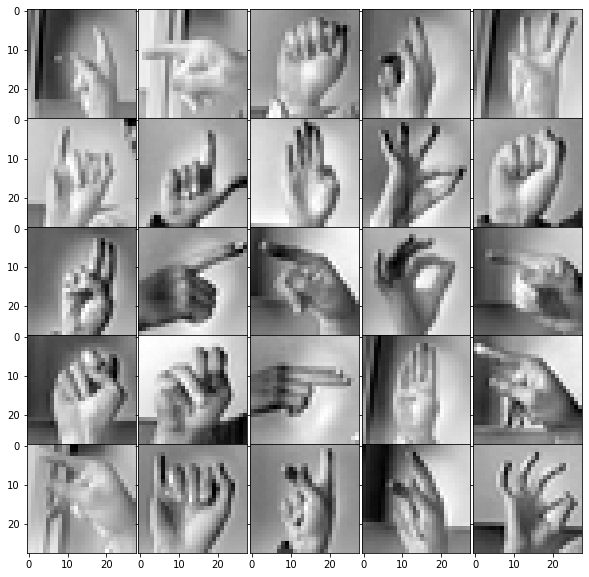

In [ ]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

Epoch 1/30
172/172 [==============================] - 10s 8ms/step - loss: 1.0899 - accuracy: 0.6896 - val_loss: 0.2657 - val_accuracy: 0.9177
Epoch 2/30
172/172 [==============================] - 1s 6ms/step - loss: 0.1125 - accuracy: 0.9758 - val_loss: 0.0424 - val_accuracy: 0.9938
Epoch 3/30
172/172 [==============================] - 1s 5ms/step - loss: 0.0233 - accuracy: 0.9977 - val_loss: 0.0171 - val_accuracy: 0.9993
Epoch 4/30
172/172 [==============================] - 1s 5ms/step - loss: 0.0091 - accuracy: 0.9994 - val_loss: 0.0062 - val_accuracy: 0.9996
Epoch 5/30
172/172 [==============================] - 1s 6ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 0.9998
Epoch 6/30
172/172 [==============================] - 1s 6ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 0.9998
Epoch 7/30
172/172 [==============================] - 1s 6ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 0.9998
Epoch

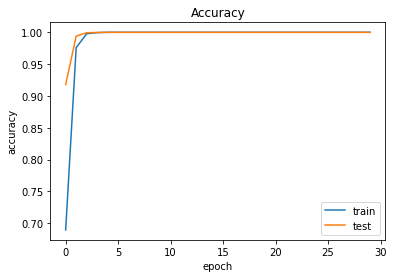

In [ ]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [ ]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    
    print(accuracy)